# Clustering

Examples from Chapter 45 of <i>Scientific Computation for Hackers: Python and the Jupyter Shell</i>

GPL license. 

In [29]:
from scipy.cluster.vq import kmeans2
import csv
import numpy as np

In [35]:
with open('clouds2.txt', "r") as csvfile:
    datafile = csv.reader(csvfile, delimiter=',')
    xdata=[]; ydata=[];
    for row in datafile:
        x,y=row
        x=float(x); y=float(y)
        try:
            xdata.append(x); ydata.append(y)
        except:
            continue

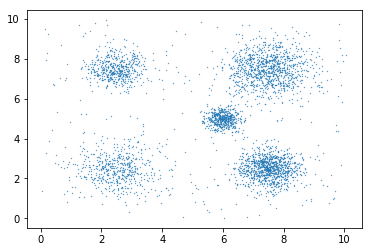

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xdata,ydata,s=.1)

In [37]:
X=np.array(list(zip(xdata,ydata)))
X

array([[7.401917, 1.872007],
       [7.38713 , 5.754185],
       [2.416709, 2.367255],
       ...,
       [1.963115, 7.202787],
       [5.732944, 4.429034],
       [5.599155, 4.098829]])

In [38]:
C,flags=kmeans2(X,5)

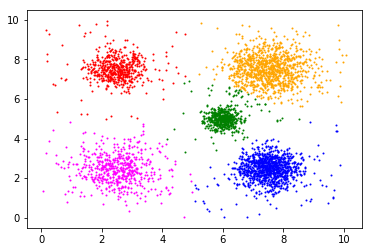

In [39]:
from matplotlib import colors as clrs
import matplotlib.pyplot as plt
%matplotlib inline
colors=["red","blue","green","orange","magenta"]
for p,q,f in zip(xdata,ydata,flags):
    plt.scatter(p,q,edgecolor=colors[f],s=1)


In [45]:
with open('smileyfacedata3.txt', "r") as csvfile:
    datafile = csv.reader(csvfile, delimiter=',')
    xdata=[]; ydata=[];
    for row in datafile:
        x,y=row
        x=float(x); y=float(y)
        try:
            xdata.append(x); ydata.append(y)
        except:
            continue
X=np.array(list(zip(xdata,ydata)))
X

array([[1.142175, 5.65388 ],
       [0.961976, 5.654621],
       [0.043144, 5.031154],
       ...,
       [3.139754, 8.984379],
       [4.542455, 9.358268],
       [9.098614, 3.016488]])

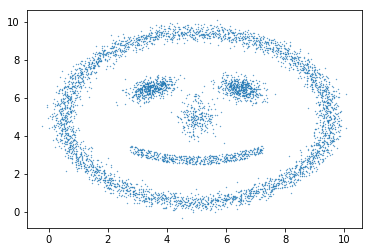

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xdata,ydata,s=.1)

In [47]:
C,flags=kmeans2(X,5)

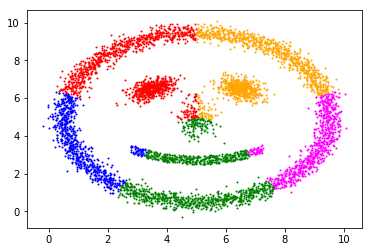

In [48]:
colors=["red","blue","green","orange","magenta"]
for p,q,f in zip(xdata,ydata,flags):
    plt.scatter(p,q,edgecolor=colors[f],s=1)

In [66]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=.13, min_samples=8).fit(X)

In [67]:
labels=db.labels_
unique_labels = set(labels)
labels

array([-1, -1, -1, ...,  0,  0,  0])

Give names to colors for first five (to ensure good contrast) then use random colors

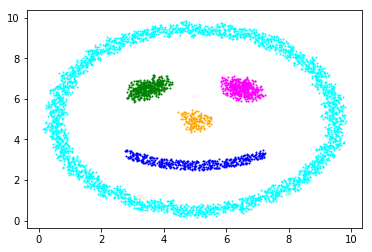

In [69]:
from matplotlib import colors as clrs
colors=["cyan","magenta","green","blue","orange"]+list(clrs.cnames)
for p,q,f in zip(xdata,ydata,labels):
    if f>-1:
        c=colors[f]
        plt.scatter(p,q,edgecolor=c,s=1)

In [70]:
import scipy.cluster.hierarchy as HC
L=HC.linkage(X)

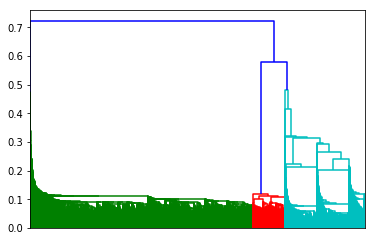

In [72]:
p=HC.dendrogram(L, truncate_mode="none", orientation="top",
no_labels=True)